## Boston notebook

This notebook contains the code for projects 2 and 4.<br>
For more details on the projects, see the pdf reports.

### Loading data and exploration

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv')

In [3]:
print(df.shape)
df.head()

(506, 14)


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [6]:
df.corr()['medv'].sort_values()

lstat     -0.737663
ptratio   -0.507787
indus     -0.483725
tax       -0.468536
nox       -0.427321
crim      -0.388305
rad       -0.381626
age       -0.376955
chas       0.175260
dis        0.249929
b          0.333461
zn         0.360445
rm         0.695360
medv       1.000000
Name: medv, dtype: float64

### Linear regression models

In [5]:
Xall = df.drop('medv',1)
Xsome = df[['lstat','chas','rm']]
y = df['medv']

In [7]:
from sklearn.linear_model import LinearRegression

lr1 = LinearRegression()
lr1.fit(Xall,y)

lr2 = LinearRegression()
lr2.fit(Xsome,y)

LinearRegression()

In [15]:
vars = ['lstat','chas','rm']

pd.DataFrame({'Model 1 coefficients': lr1.coef_[[12, 3, 5]],
             'Model 2 coefficients': lr2.coef_}, index = vars)


,Model 1 coefficients,Model 2 coefficients
lstat,-0.524758,-0.642848
chas,2.686734,4.120479
rm,3.809865,4.955812


### Baseline

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(Xall, y, test_size=0.2)
lr = LinearRegression()
lr.fit(X_train,y_train)
print('MSE: {}'.format(mean_squared_error(y_test,lr.predict(X_test))))

MSE: 26.25836813474162


### Dimensionality reduction

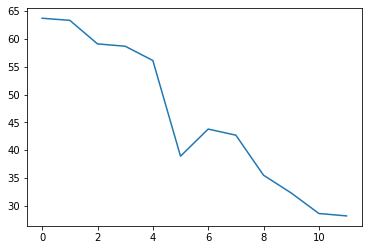

In [28]:
from sklearn.decomposition import PCA

errorsP = []

for i in range(1,13):
    pca = PCA(n_components = i)
    pca.fit(X_train)
    X1 = pca.transform(X_train)
    
    lr = LinearRegression()
    lr.fit(X1,y_train)
    
    X2 = pca.transform(X_test)
    errorsP.append(mean_squared_error(y_test,lr.predict(X2)))

plt.plot(errorsP)

C:\Users\wcaexqdz\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"
C:\Users\wcaexqdz\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"
C:\Users\wcaexqdz\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"
C:\Users\wcaexqdz\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. 

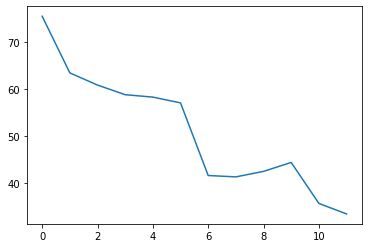

In [25]:
from sklearn.decomposition import NMF

errorsN = []

for i in range(1,13):
    nmf = NMF(n_components = i)
    nmf.fit(X_train)
    X1 = nmf.transform(X_train)
    
    lr = LinearRegression()
    lr.fit(X1,y_train)
    
    X2 = nmf.transform(X_test)
    errorsN.append(mean_squared_error(y_test,lr.predict(X2)))

plt.plot(errorsN)

In [30]:
results = pd.DataFrame({'PCA': errorsP, 'NMF': errorsN}, index = list(range(1,13)))
results

,PCA,NMF
1,63.712254,75.430636
2,63.334535,63.423244
3,59.103642,60.842682
4,58.690266,58.797003
5,56.125337,58.288509
6,38.950594,57.065089
7,43.816914,41.667520
8,42.720706,41.379200
9,35.532769,42.541446
10,32.346934,44.440038
